In [248]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [249]:
df = pd.read_csv("ds_salaries.csv")
print(df.info())

# везде 3755 not-null

# пропусков нет
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio        

In [250]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [252]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [253]:
df[df.duplicated()]

# 1171 rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [254]:
# Убираем дубликаты
tmp = df.copy().drop_duplicates().reset_index()
tmp

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...,...
2579,3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
2580,3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
2581,3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
2582,3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


                                    salary_in_usd
job_title                                        
Research Scientist                         450000
Data Analyst                               430967
AI Scientist                               423834
Applied Machine Learning Scientist         423000
Principal Data Scientist                   416000


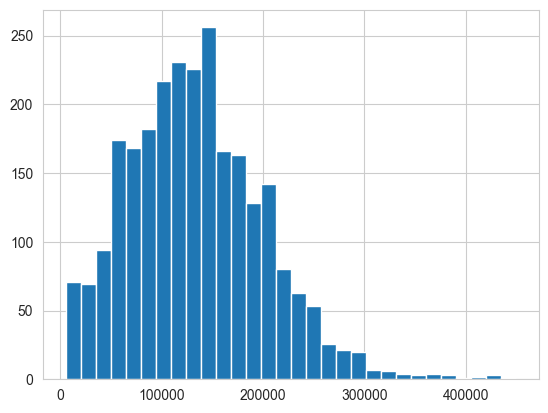

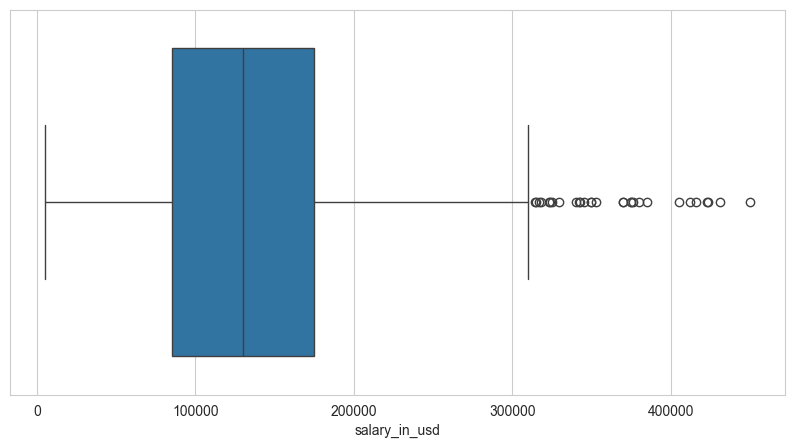

33                Computer Vision Engineer
131              Machine Learning Engineer
207                           Head of Data
392               Director of Data Science
427                           AI Scientist
512                         Data Architect
645                     Research Scientist
785                         Data Scientist
874     Machine Learning Software Engineer
890                           Data Analyst
964                      Applied Scientist
1564                Data Science Tech Lead
2248                         Data Engineer
2294                   Data Analytics Lead
2299                Applied Data Scientist
2505              Principal Data Scientist
2576    Applied Machine Learning Scientist
Name: job_title, dtype: object

In [258]:
# Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
print(tmp.groupby('job_title').agg({'salary_in_usd':max}).sort_values(['salary_in_usd'], ascending=False).head(5))

tmp['salary_in_usd'].hist(bins=30)

plt.figure(figsize=(10,5))
sns.boxplot(tmp.salary_in_usd, orient='h')
plt.show()

tmp[tmp.salary_in_usd > 320000]['job_title'].drop_duplicates()

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

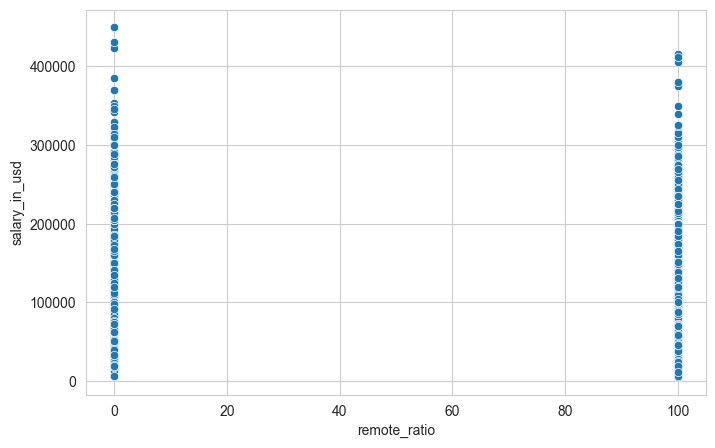

In [260]:
# Влияет ли удаленная работа на зарплату? Есть ли корреляция?

df_remote_or_not = tmp[(tmp['remote_ratio'] == 100) | (tmp['remote_ratio'] == 0)]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_remote_or_not.remote_ratio, y=df_remote_or_not.salary_in_usd)

# не влияет

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

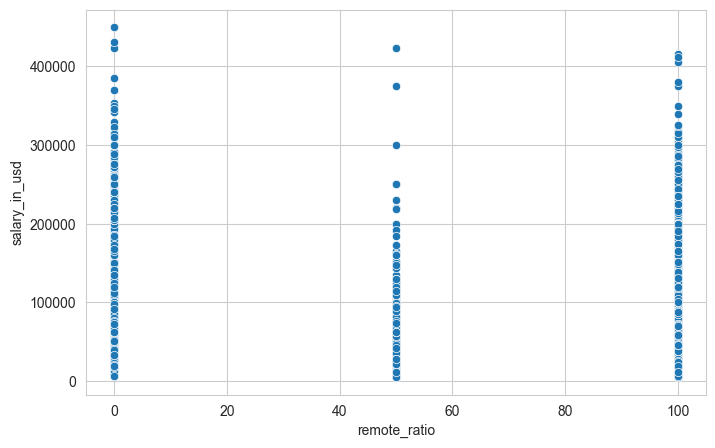

In [261]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=tmp.remote_ratio, y=tmp.salary_in_usd)

<Axes: >

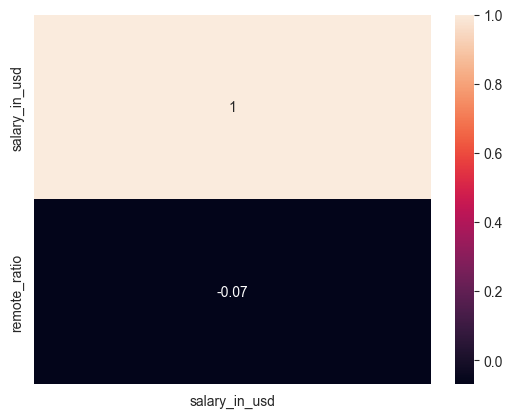

In [262]:
sns.heatmap(df_remote_or_not[['salary_in_usd', 'remote_ratio']].corr('kendall')[['salary_in_usd']], annot=True)

<Axes: >

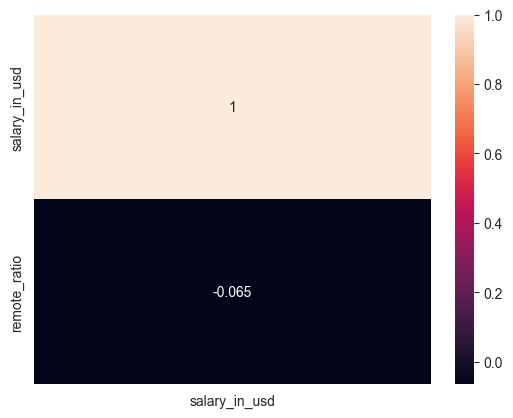

In [263]:
sns.heatmap(tmp[['salary_in_usd', 'remote_ratio']].corr('kendall')[['salary_in_usd']], annot=True)

<Axes: >

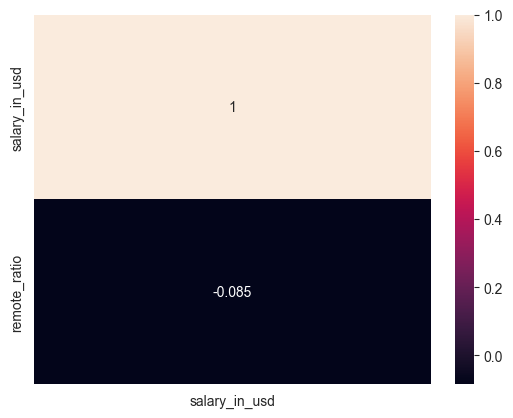

In [264]:
sns.heatmap(tmp[['salary_in_usd', 'remote_ratio']].corr()[['salary_in_usd']], annot=True)

<Axes: >

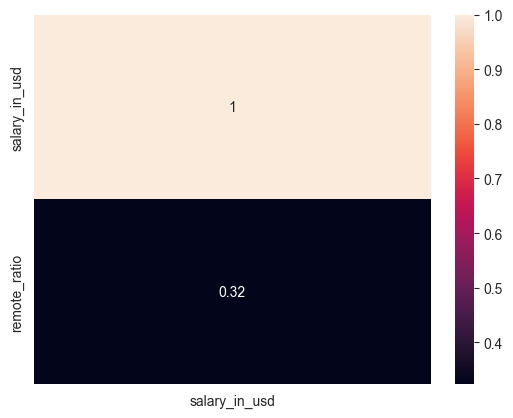

In [265]:
sns.heatmap(tmp[['salary_in_usd', 'remote_ratio']].phik_matrix(interval_cols=['salary_in_usd', 'remote_ratio'])[['salary_in_usd']], annot=True)

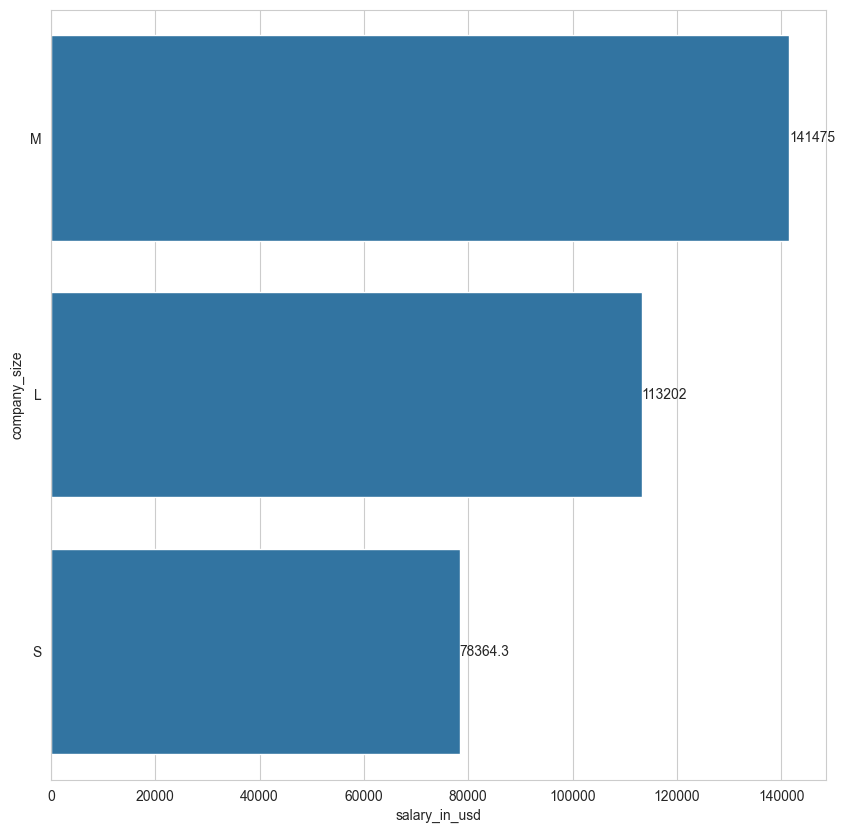

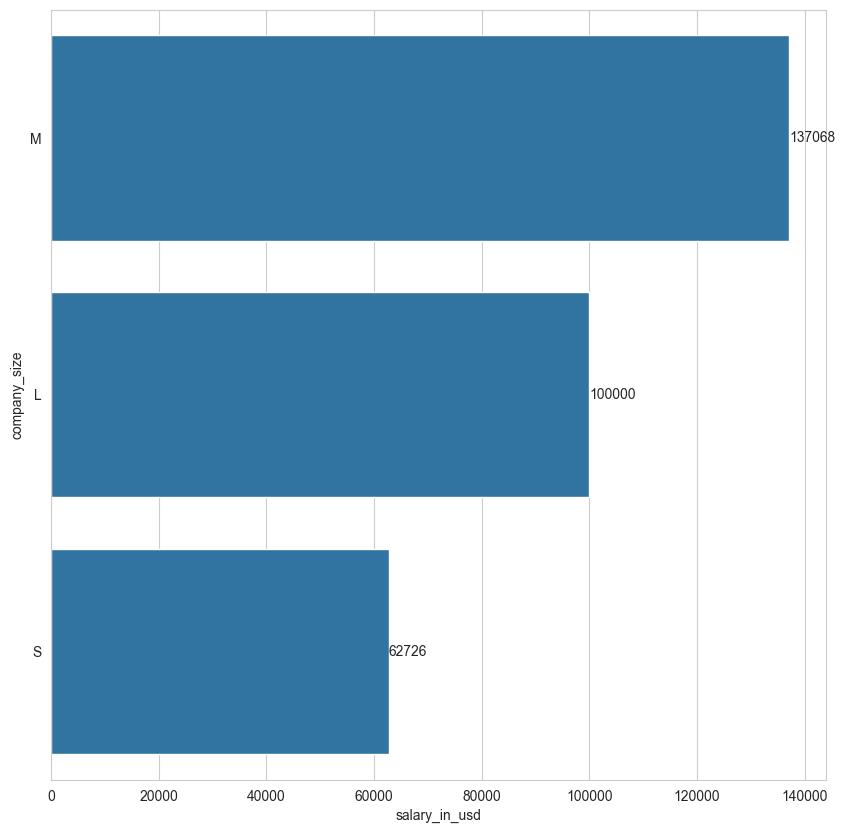

In [266]:
# Зависит ли заработная плата от размера предприятия?

tmp_2 = tmp.groupby('company_size')['salary_in_usd'].agg('mean').sort_values(ascending=False)
tmp_3 = tmp.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x=tmp_2, y=tmp_2.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(10,10))
ax = sns.barplot(x=tmp_3, y=tmp_3.index, orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Влияет, чем больше компания, тем больше зарплата

In [267]:
# Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

tmp[['company_location', 'job_title']]
temp_4 = tmp.groupby(['company_location', 'job_title'])['company_location'].agg('count').sort_values(ascending=False)
temp_4.head(25)

# US, GB

company_location  job_title                 
US                Data Engineer                 487
                  Data Scientist                396
                  Data Analyst                  319
                  Machine Learning Engineer     137
                  Analytics Engineer             80
                  Data Architect                 60
                  Data Science Manager           46
                  Research Scientist             43
GB                Data Engineer                  42
US                Applied Scientist              31
GB                Data Scientist                 29
US                ML Engineer                    28
                  Research Engineer              27
GB                Data Analyst                   24
US                Machine Learning Scientist     21
GB                Machine Learning Engineer      20
CA                Data Scientist                 19
US                Data Manager                   18
                  D

In [268]:
tmp[(tmp.company_location == 'US') | (tmp.company_location == 'GB')].groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False)

company_location
US    145885.0
GB     80036.0
Name: salary_in_usd, dtype: float64

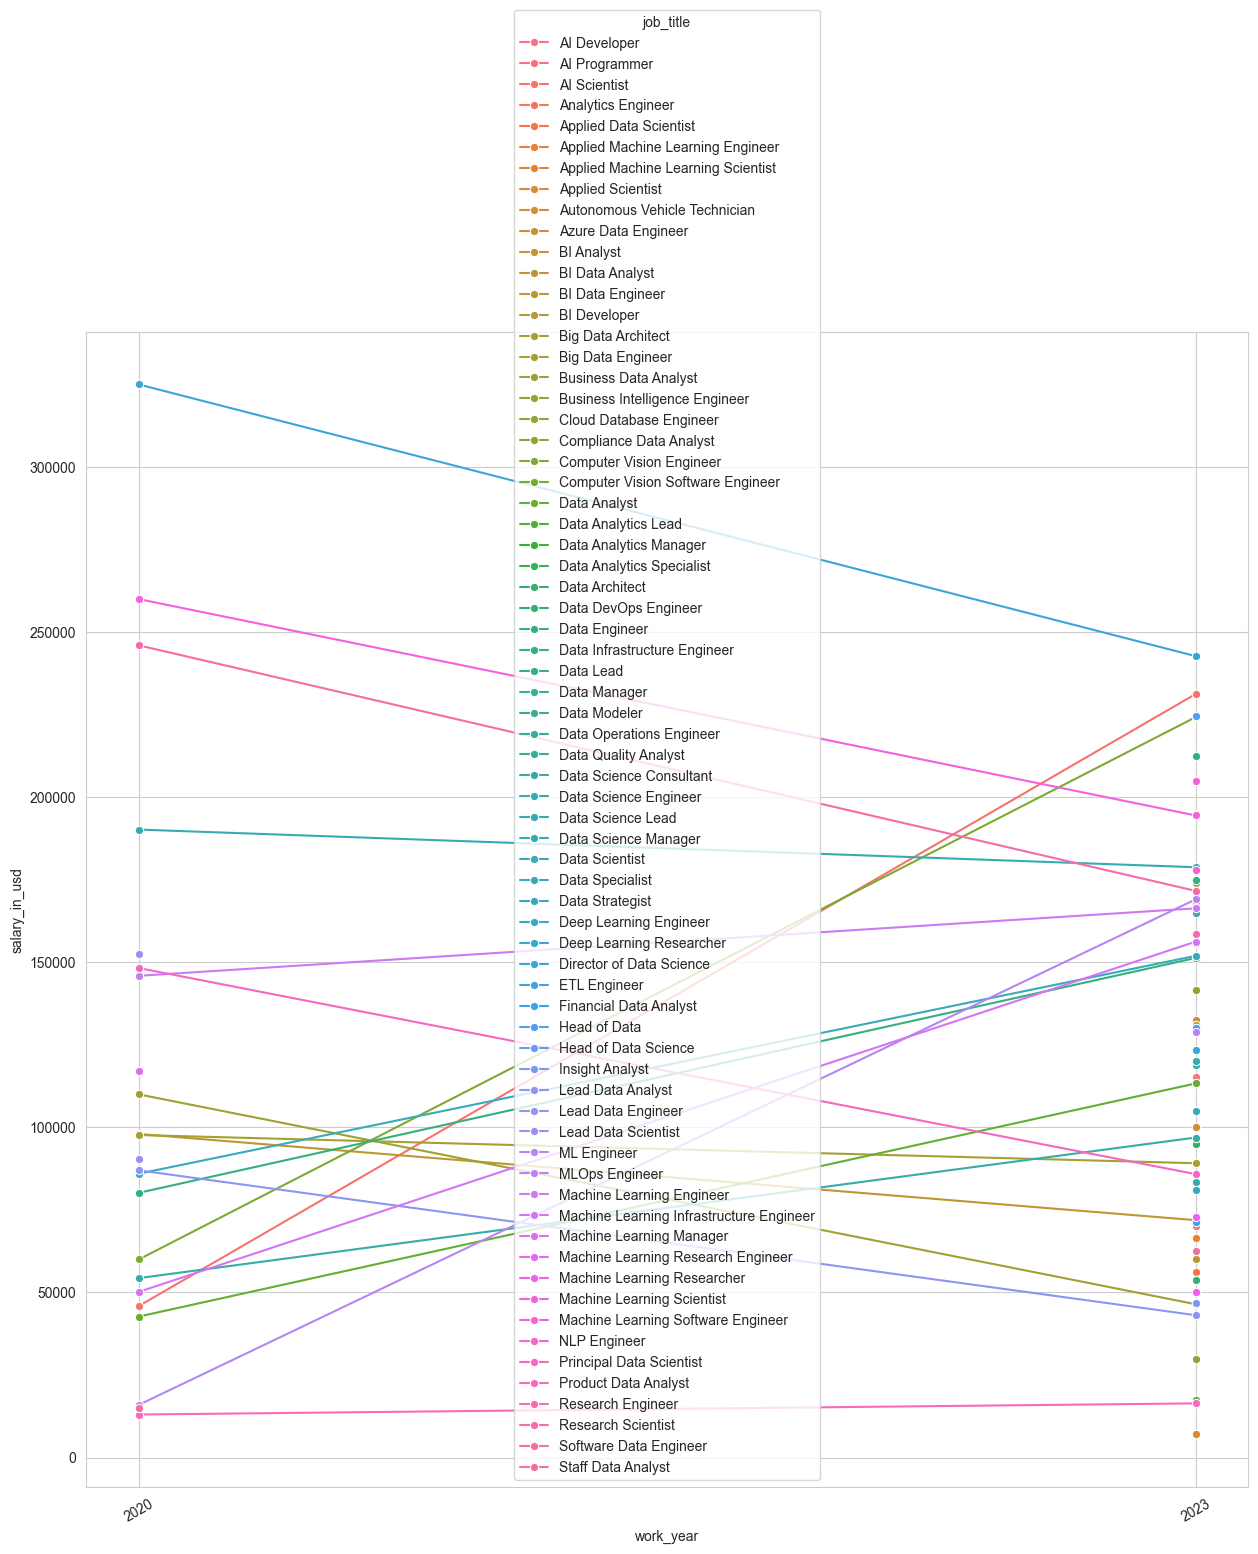

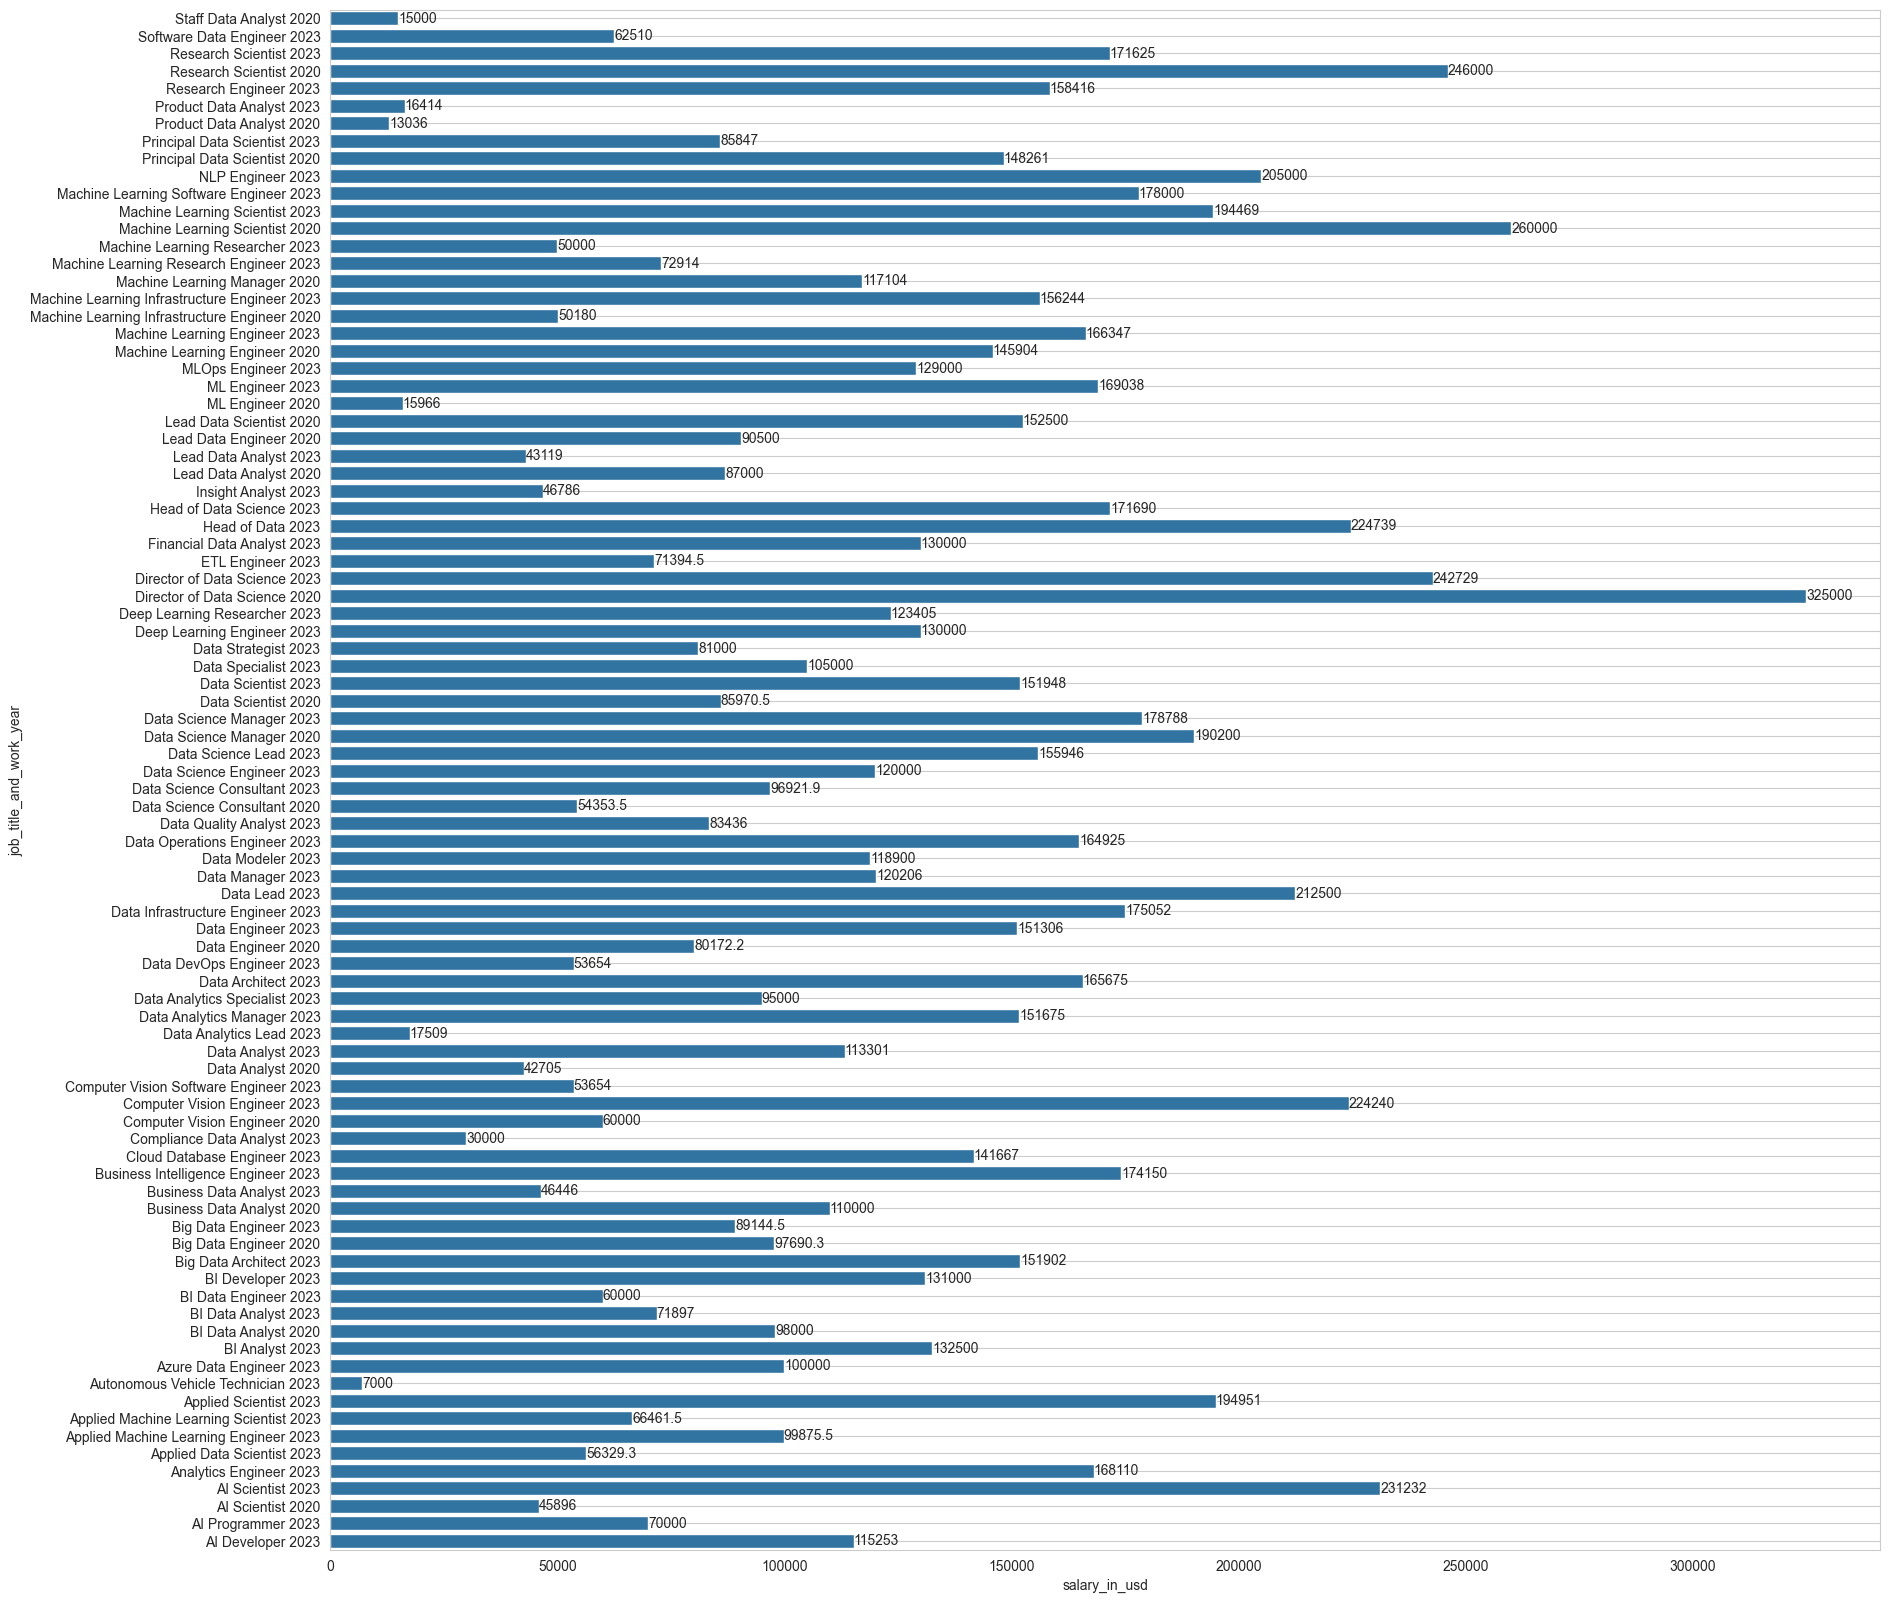

In [269]:
# Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

temp_5 = tmp[(tmp.work_year == 2020) | (tmp.work_year == 2023)].groupby(['job_title', 'work_year'])['salary_in_usd'].agg('mean').reset_index()


plt.figure(figsize=(15,15))
ax = sns.lineplot(x=temp_5.work_year, y=temp_5.salary_in_usd, hue=temp_5.job_title, marker='o')
ax.set_xticks(temp_5.work_year.unique())
plt.xticks(rotation=30)
plt.show()

temp_6 = tmp.copy()
temp_6['job_title_and_work_year'] = temp_6['job_title'] + " " + temp_6['work_year'].map(str)

temp_7 = temp_6[(temp_6.work_year == 2020) | (temp_6.work_year == 2023)].groupby(['job_title_and_work_year'])['salary_in_usd'].agg('mean').sort_index(ascending=False)
temp_7

plt.figure(figsize=(20,20))
ax = sns.barplot(x=temp_7, y=temp_7.index, orient='h')
ax.bar_label(ax.containers[0])
plt.grid()
plt.show()

In [270]:
# Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа

temp_8 = tmp.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

vc = temp_8.drop('salary_in_usd', axis=1).job_title.value_counts()
df_tmp = temp_8[temp_8.job_title.isin(vc.index[vc.gt(3)])]
list_of_jobs = list(df_tmp['job_title'])

print(temp_8[temp_8.job_title.isin(list_of_jobs)])
print(temp_8[(temp_8.job_title.isin(list_of_jobs))].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index())
print(temp_8[(temp_8.job_title.isin(list_of_jobs)) & (temp_8.work_year > 2020)].groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index())


                      job_title  work_year  salary_in_usd
2      Director of Data Science       2020  325000.000000
3    Machine Learning Scientist       2020  260000.000000
5            Research Scientist       2020  246000.000000
6      Director of Data Science       2023  242728.666667
7      Principal Data Scientist       2021  239152.400000
..                          ...        ...            ...
179                Data Analyst       2020   42705.000000
186                AI Scientist       2021   25410.600000
187           Big Data Engineer       2021   24544.200000
188    Computer Vision Engineer       2021   23838.666667
192                 ML Engineer       2020   15966.000000

[68 rows x 3 columns]
                                   job_title  salary_in_usd
0                   Director of Data Science  215336.991667
1                 Machine Learning Scientist  185491.649038
2                       Data Science Manager  175880.317349
3                         Research Scient

In [271]:
tmp[(tmp.job_title == 'Director of Data Science') & (tmp.work_year > 2020)].sort_values(['work_year', 'salary_in_usd'], ascending=[False, False])

# Director of Data Science, US, remote_ratio = 0

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
392,478,2023,EX,FT,Director of Data Science,353200,USD,353200,US,0,US,M
393,479,2023,EX,FT,Director of Data Science,249300,USD,249300,US,0,US,M
923,1339,2023,SE,FT,Director of Data Science,170000,CAD,125686,CA,50,CA,M
2254,3420,2022,EX,FT,Director of Data Science,250000,CAD,192037,CA,50,CA,L
1863,2849,2022,SE,FT,Director of Data Science,55000,EUR,57786,FR,50,FR,L
2343,3512,2021,EX,FT,Director of Data Science,250000,USD,250000,US,0,US,L
2574,3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
2372,3541,2021,EX,FT,Director of Data Science,130000,EUR,153667,IT,100,PL,L
2473,3643,2021,EX,FT,Director of Data Science,120000,EUR,141846,DE,0,DE,L
2346,3515,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M


In [272]:
# Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?
tmp.groupby('employee_residence')['index'].count().sort_values(ascending=False).head(20)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
GR      13
AU      11
MX      10
IT       8
PK       8
JP       7
NG       7
IE       7
AR       6
AT       6
Name: index, dtype: int64

In [273]:
print(tmp[(tmp.employee_residence == 'US') & (tmp.company_location != 'US')][['employee_residence', 'remote_ratio', 'company_location']])

     employee_residence  remote_ratio company_location
1437                 US           100               AU
1487                 US           100               CR
1874                 US            50               DE
2506                 US           100               CA
2548                 US           100               FR


In [274]:
count_all_in_us = len(tmp[tmp.employee_residence == 'US'])
count_remote_not_in_us = len(tmp[(tmp.employee_residence == 'US') & ((tmp.company_location != 'US') & (tmp.remote_ratio == 100))][['employee_residence', 'remote_ratio', 'company_location']])

round(count_remote_not_in_us / count_all_in_us * 100, 2)

0.21